In [2]:
from utils import collect, add_info
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from math import pi
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np



paths_combined = [Path("/work/dlclarge2/hoffmaja-pruneshift/shashank_runs/icml_runs_new/mnasnet/kd_pruning_amda/"),
                  Path("/work/dlclarge2/hoffmaja-pruneshift/shashank_runs/icml_runs_new/mnasnet/pruning_amda/"),
                  Path("/work/dlclarge2/hoffmaja-pruneshift/shashank_runs/icml_runs_new/mobilenet_v2/kd_pruned_amda/"),
                  Path("/work/dlclarge2/hoffmaja-pruneshift/shashank_runs/icml_runs_new/mobilenet_v2/pruned_amda/"),
                  Path("/work/dlclarge2/hoffmaja-pruneshift/shashank_runs/icml_runs_new/amda_resnet/kd_pruning_amda/"),
                  Path("/work/dlclarge2/hoffmaja-pruneshift/shashank_runs/icml_runs_new/amda_resnet/pruning_amda/")]

path_baseline = Path("/work/dlclarge2/hoffmaja-pruneshift/experiments/img100/basemodels/resnet18_amda/")

path_unpruned = [Path("/work/dlclarge2/hoffmaja-pruneshift/shashank_runs/icml_runs_new/mobilenet_v2/mobilenet_v2_scaled_2_amda/"),
                 Path("/work/dlclarge2/hoffmaja-pruneshift/shashank_runs/icml_runs_new/amda_resnet/resnet_18_amda_scaled_2/"),
                 Path("/work/dlclarge2/hoffmaja-pruneshift/shashank_runs/icml_runs_new/mnasnet/mnasnet_scaled_2_amda/"),
                 Path("/work/dlclarge2/hoffmaja-pruneshift/shashank_runs/icml_runs_new/mobilenet_v2/mobilenet_v2_scaled_2_amda_kd//"),
                 Path("/work/dlclarge2/hoffmaja-pruneshift/shashank_runs/icml_runs_new/amda_resnet/resnet18_amda_scaled_2_kd/"),
                 Path("/work/dlclarge2/hoffmaja-pruneshift/shashank_runs/icml_runs_new/mnasnet/mnasnet_scaled_2_amda_kd/")]

sns.set_context("talk")
sns.set_style("ticks")


In [3]:
df_wider = collect(*path_unpruned)

In [4]:
df_prune = collect(*paths_combined)

In [5]:
# for idx in range(len(df_prune)):
#     if df_prune["Teacher"].iloc[idx] != "AMDA ResNet50":
#         continue
#     df_prune["Prune Method"].iloc[idx] += "+ KD"

In [6]:
# Add point zero.
entries = []
for (network, method), _ in df_prune.groupby(by=["Network", "Prune Method"]):
    entry = df_wider.query(f"Network == '{network}'").copy()
    entry[["Prune Method", "Prune Amount"]] = [method, 0.]
    entries.append(entry)

df_prune = df_prune.append(pd.concat(entries))

In [7]:
add_info(df_prune)

,Amda,Augmix,DeepAugment,Epochs,ImageNet100 Error,ImageNet100-C Error,ImageNet100-R Error,LearningRate,Loss,Network,...,Prune Amount,Prune Method,Prune Ratio,Scaling,Teacher,WeightDecay,kd_T,kd_mixture,MACs,Model Size
180,True,True,True,60,26.220000,45.385069,65.093121,0.1,StandardLoss,mobilenet_v2,...,0.75,L¹ Filter,4.000000,1.45,NaN,0.0002,None,None,1.563029e+08,1.198345
180,True,True,True,60,23.100001,42.102659,64.207190,0.1,StandardLoss,mnasnet,...,0.75,Random Weight,4.000000,1.45,NaN,0.0002,None,None,1.625427e+08,1.574235
180,True,True,True,60,10.360003,29.105604,52.159855,0.1,KnowledgeDistill,mobilenet_v2,...,0.75,Global Weight,4.000000,1.45,AMDA ResNet50,0.0002,4.0,0.9,2.654710e+08,1.198721
180,True,True,True,60,9.520000,27.076006,50.433263,0.1,KnowledgeDistill,mobilenet_v2,...,0.25,Global Weight,1.333333,1.45,AMDA ResNet50,0.0002,4.0,0.9,5.230020e+08,3.596163
180,True,True,True,60,11.379999,26.258403,53.246251,0.1,StandardLoss,resnet18,...,0.75,Random Weight,4.000000,1.45,NaN,0.0002,None,None,1.053727e+09,5.880352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,True,True,True,60,10.000002,23.313868,50.627264,0.1,StandardLoss,resnet18,...,0.00,L¹ Filter,NaN,1.45,NaN,0.0002,None,None,3.721060e+09,23.521408
180,True,True,True,60,7.700002,22.082400,45.757890,0.1,KnowledgeDistill,resnet18,...,0.00,Random Filter,NaN,1.45,AMDA ResNet50,0.0002,4.0,0.9,3.721060e+09,23.521408
180,True,True,True,60,10.000002,23.313868,50.627264,0.1,StandardLoss,resnet18,...,0.00,Random Filter,NaN,1.45,NaN,0.0002,None,None,3.721060e+09,23.521408
180,True,True,True,60,7.700002,22.082400,45.757890,0.1,KnowledgeDistill,resnet18,...,0.00,Random Weight,NaN,1.45,AMDA ResNet50,0.0002,4.0,0.9,3.721060e+09,23.521408


In [8]:
df_prune["Distillation Method"] = df_prune["Loss"].map({"StandardLoss": "No Distill.", "KnowledgeDistill": "KD"})

In [9]:
df_prune = df_prune.sort_values(by=["Prune Method", "Distillation Method"])

mobilenet_v2
mnasnet
resnet18


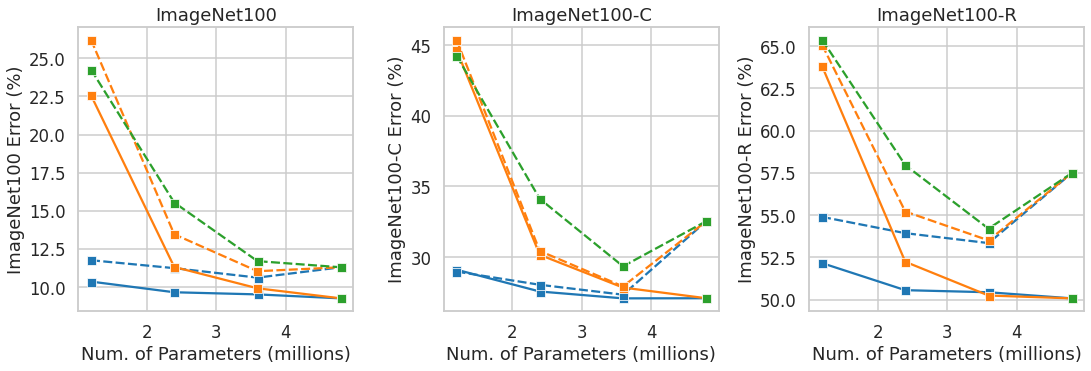

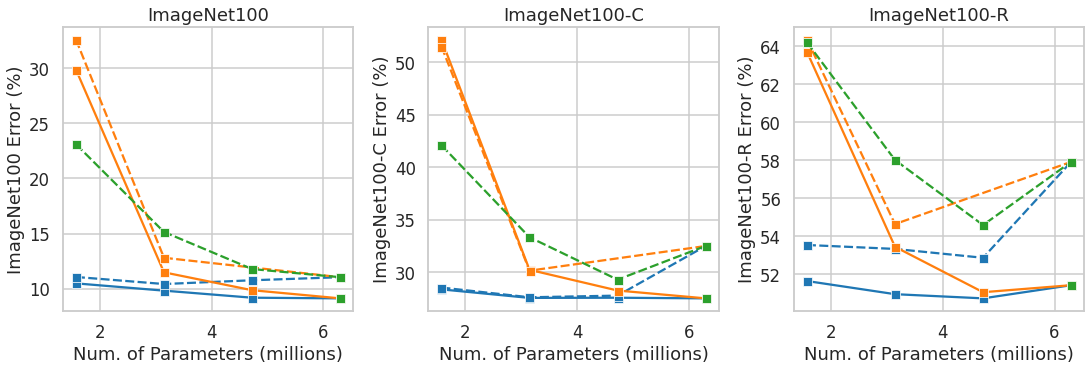

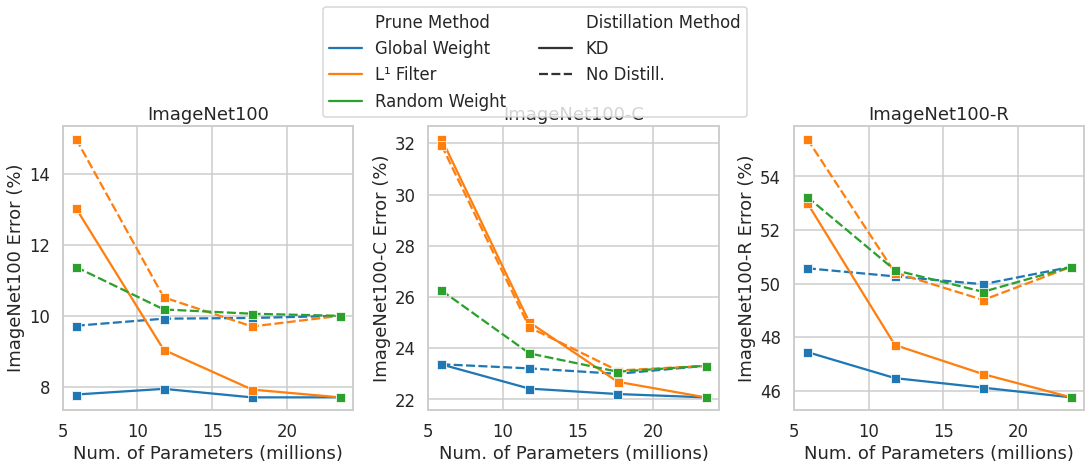

In [20]:
sns.set_style("whitegrid")
ERROR_LABELS = {"ImageNet100 Error": "ImageNet100", "ImageNet100-C Error": "ImageNet100-C", "ImageNet100-R Error": "ImageNet100-R"}

for network in df_prune["Network"].unique():
    fig, axes = plt.subplots(1, 3, figsize=(15.5, 5.5))
    df_part = df_prune.query(f"Network == '{network}'")
    print(network)

    for (error, label), ax in zip(ERROR_LABELS.items(), axes.flatten()):
        sns.lineplot(data=df_part, x="Model Size", y=error , hue="Prune Method", ax=ax, marker="s", style="Distillation Method")

        # y, x = df_baseline.query(f"Network == '{network}' & Amda")[[error, "Model Size"]].to_numpy()[0]

        # ax.scatter(x, y, marker='x', color='black', label='Original Model', zorder=19)

        handles, labels = ax.get_legend_handles_labels()
        ax.legend('', frameon=False)
        ax.set_title(label)
        ax.set_ylabel(error + " (%)" )
        ax.set_xlabel("Num. of Parameters (millions)")

    if network == "resnet18":
        fig.legend(handles, labels, bbox_to_anchor=(0.3, 1.2), loc=2, borderaxespad=0., ncol=2)
    fig.tight_layout()

    plt.savefig(f"figures/combined_suppl_plot_{network}_amda.pdf", bbox_inches='tight')

In [19]:
path_baseline = Path("/work/dlclarge2/hoffmaja-pruneshift/experiments/img100/workshop/baselines/")
df_baseline=collect(path_baseline).query("Scaling == 1 & `Network` == 'resnet18'")
add_info(df_baseline)

,Amda,Augmix,DeepAugment,Epochs,ImageNet100 Error,ImageNet100-C Error,ImageNet100-R Error,LearningRate,Loss,Network,Path,Scaling,WeightDecay,kd_T,kd_mixture,MACs,Model Size
270,False,False,False,90,11.739999,51.112539,68.669167,0.1,StandardLoss,resnet18,/work/dlclarge2/hoffmaja-pruneshift/experiment...,1,0.0002,None,None,1.821716e+09,11.227812
90,True,True,True,30,12.980002,28.012806,53.563115,0.1,StandardLoss,resnet18,/work/dlclarge2/hoffmaja-pruneshift/experiment...,1,0.0002,None,None,1.821716e+09,11.227812


resnet18


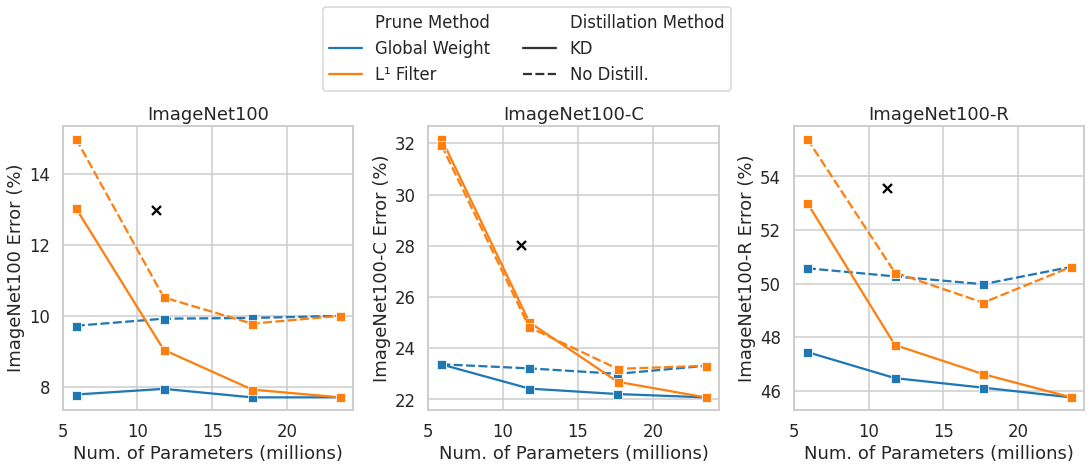

In [36]:
sns.set_style("whitegrid")
ERROR_LABELS = {"ImageNet100 Error": "ImageNet100", "ImageNet100-C Error": "ImageNet100-C", "ImageNet100-R Error": "ImageNet100-R"}
df_prune=df_prune.query("`Network` == 'resnet18' & `Prune Method` != 'Random Filter' & `Prune Method` != 'Random Weight'")
for network in df_prune["Network"].unique():
    fig, axes = plt.subplots(1, 3, figsize=(15.5, 5.5))
    df_part = df_prune.query(f"Network == '{network}'")
    print(network)
    if network != "resnet18":
        continue

    for (error, label), ax in zip(ERROR_LABELS.items(), axes.flatten()):
        sns.lineplot(data=df_part, x="Model Size", y=error , hue="Prune Method", ax=ax, marker="s", style="Distillation Method")

        y, x = df_baseline.query(f"Network == '{network}' & Amda")[[error, "Model Size"]].to_numpy()[0]

        ax.scatter(x, y, marker='x', color='black', label='Original Model', zorder=19)

        handles, labels = ax.get_legend_handles_labels()
        ax.legend('', frameon=False)
        ax.set_title(label)
        ax.set_ylabel(error + " (%)" )
        ax.set_xlabel("Num. of Parameters (millions)")

    
    fig.legend(handles[:-1], labels[:-1], bbox_to_anchor=(0.3, 1.2), loc=2, borderaxespad=0., ncol=2)
    fig.tight_layout()

    plt.savefig(f"figures/combined_suppl_plot_{network}_amda.pdf", bbox_inches='tight')

,Amda,Augmix,DeepAugment,Epochs,ImageNet100 Error,ImageNet100-C Error,ImageNet100-R Error,LearningRate,Loss,Network,...,Prune Method,Prune Ratio,Scaling,Teacher,WeightDecay,kd_T,kd_mixture,MACs,Model Size,Distillation Method
180,True,True,True,60,10.479999,28.385592,51.655456,0.1,KnowledgeDistill,mnasnet,...,Global Weight,4.000000,1.45,AMDA ResNet50,0.0002,4.0,0.9,256923941.0,1.574235,KD
180,True,True,True,60,9.179997,27.590930,50.743663,0.1,KnowledgeDistill,mnasnet,...,Global Weight,1.333333,1.45,AMDA ResNet50,0.0002,4.0,0.9,528616254.0,4.722705,KD
180,True,True,True,60,9.820002,27.574664,50.963527,0.1,KnowledgeDistill,mnasnet,...,Global Weight,2.000000,1.45,AMDA ResNet50,0.0002,4.0,0.9,399569502.0,3.148470,KD
180,True,True,True,60,9.119999,27.530658,51.435593,0.1,KnowledgeDistill,mnasnet,...,Global Weight,NaN,1.45,AMDA ResNet50,0.0002,4.0,0.5,636345668.0,6.296940,KD
180,True,True,True,60,10.420001,27.633870,53.343248,0.1,StandardLoss,mnasnet,...,Global Weight,2.000000,1.45,NaN,0.0002,None,None,399569502.0,3.148470,No Distill.
180,True,True,True,60,11.059999,28.559202,53.550181,0.1,StandardLoss,mnasnet,...,Global Weight,4.000000,1.45,NaN,0.0002,None,None,256923941.0,1.574235,No Distill.
180,True,True,True,60,10.759997,27.791739,52.877653,0.1,StandardLoss,mnasnet,...,Global Weight,1.333333,1.45,NaN,0.0002,None,None,528616254.0,4.722705,No Distill.
180,True,True,True,60,11.040002,32.511193,57.921624,0.1,StandardLoss,mnasnet,...,Global Weight,NaN,1.45,NaN,0.0002,None,None,636345668.0,6.296940,No Distill.
180,True,True,True,60,29.860002,52.150404,63.702795,0.1,KnowledgeDistill,mnasnet,...,L¹ Filter,4.000000,1.45,AMDA ResNet50,0.0002,4.0,0.9,161762712.0,1.575050,KD
180,True,True,True,60,11.479998,30.246937,53.453180,0.1,KnowledgeDistill,mnasnet,...,L¹ Filter,2.000000,1.45,AMDA ResNet50,0.0002,4.0,0.9,320828764.0,3.148952,KD


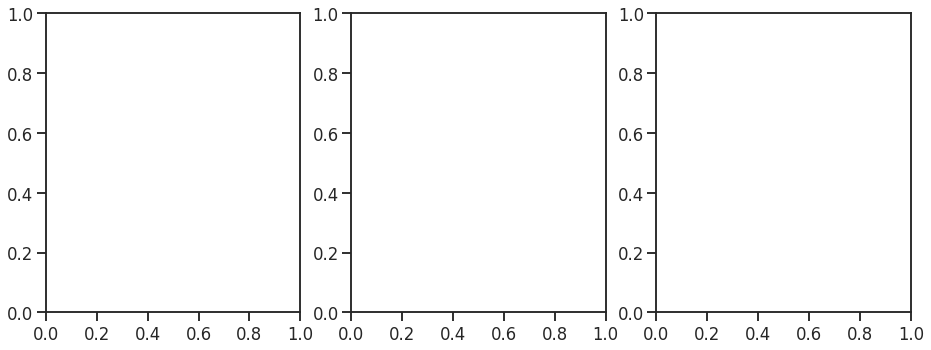

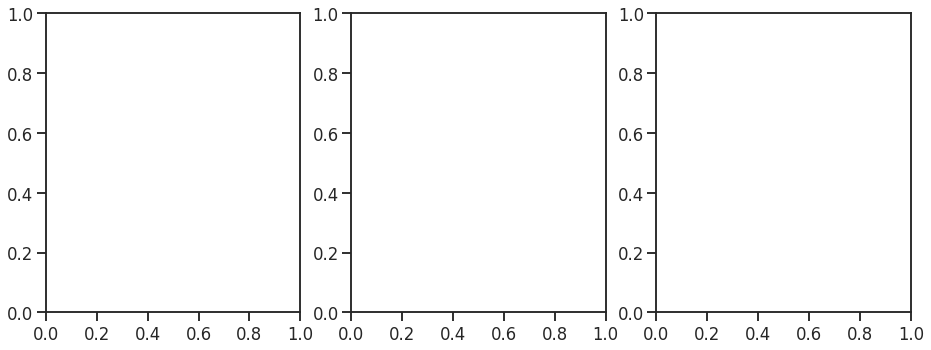

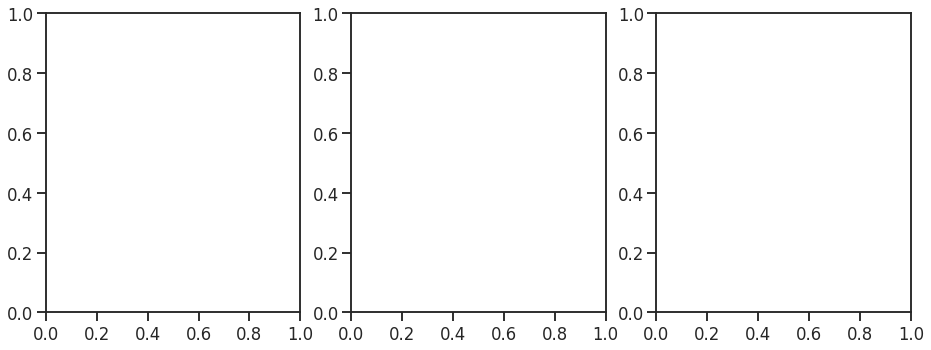

In [10]:
for network in df_prune["Network"].unique():
    fig, axes = plt.subplots(1, 3, figsize=(15.5, 5.5))
    df_part = df_prune.query(f"Network == '{network}'")
df_part